**Problem Statement 2:** Neural Network Implementation and Visualization for MNIST Dataset

**Task:**
Implement a Neural Network for the MNIST Dataset and Create a Visualization

Objective:
Implement a neural network using PyTorch to classify handwritten digits from the MNIST dataset. Create an interactive visualization interface similar to TensorFlow Playground. This task will test your understanding of neural network implementation, PyTorch, and visualization techniques.
SUBMITTED BY- Anuroop Arya

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns




In [18]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



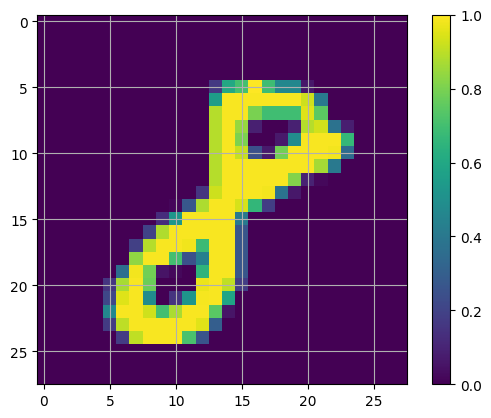

In [19]:
plt.imshow(train_images[31])
plt.colorbar()
plt.grid(True)
plt.show()

In [3]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1
)
datagen.fit(train_images)


In [4]:

# Build the CNN model with batch normalization and dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])



In [5]:
# Learning rate scheduler
def lr_scheduler(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 10:
        return 0.0005
    else:
        return 0.0001

lr_schedule = LearningRateScheduler(lr_scheduler)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Training the model with data augmentation and callbacks
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=15, validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, lr_schedule])



Epoch 1/15
1875/1875 [==============================] - 55s 18ms/step - loss: 0.3132 - accuracy: 0.9028 - val_loss: 0.0416 - val_accuracy: 0.9857 - lr: 0.0010
Epoch 2/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1322 - accuracy: 0.9586 - val_loss: 0.0450 - val_accuracy: 0.9858 - lr: 0.0010
Epoch 3/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1052 - accuracy: 0.9679 - val_loss: 0.0273 - val_accuracy: 0.9914 - lr: 0.0010
Epoch 4/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0924 - accuracy: 0.9719 - val_loss: 0.0245 - val_accuracy: 0.9924 - lr: 0.0010
Epoch 5/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0806 - accuracy: 0.9761 - val_loss: 0.0172 - val_accuracy: 0.9936 - lr: 0.0010
Epoch 6/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0641 - accuracy: 0.9808 - val_loss: 0.0156 - val_accuracy: 0.9950 - lr: 5.0000e-04
Epoch 7/15
1875/1875 [====================

In [20]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc}\n")



313/313 [==============================] - 1s 3ms/step - loss: 0.0131 - accuracy: 0.9957

Test accuracy: 0.9957000017166138



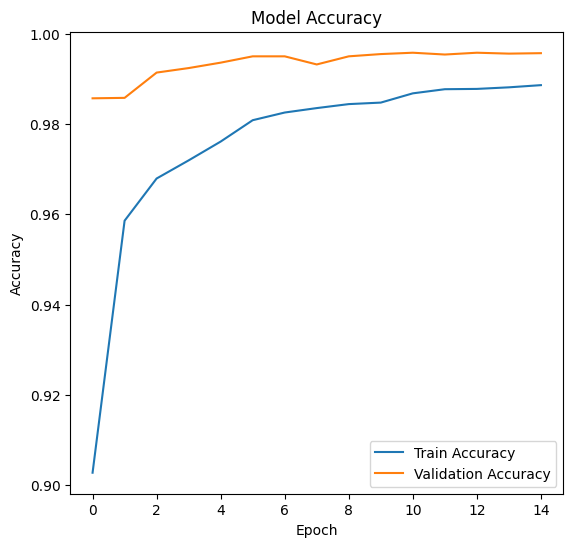

In [7]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



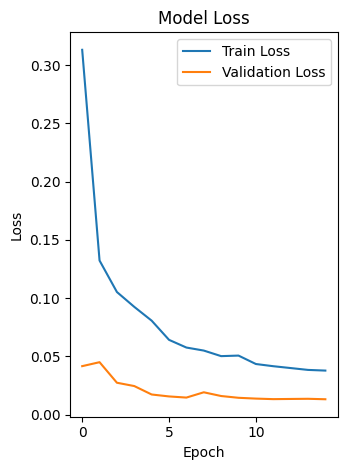

In [8]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [9]:
# Confusion matrix
Y_pred = model.predict(test_images)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(test_labels, axis=1)
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)



313/313 [==============================] - 1s 2ms/step


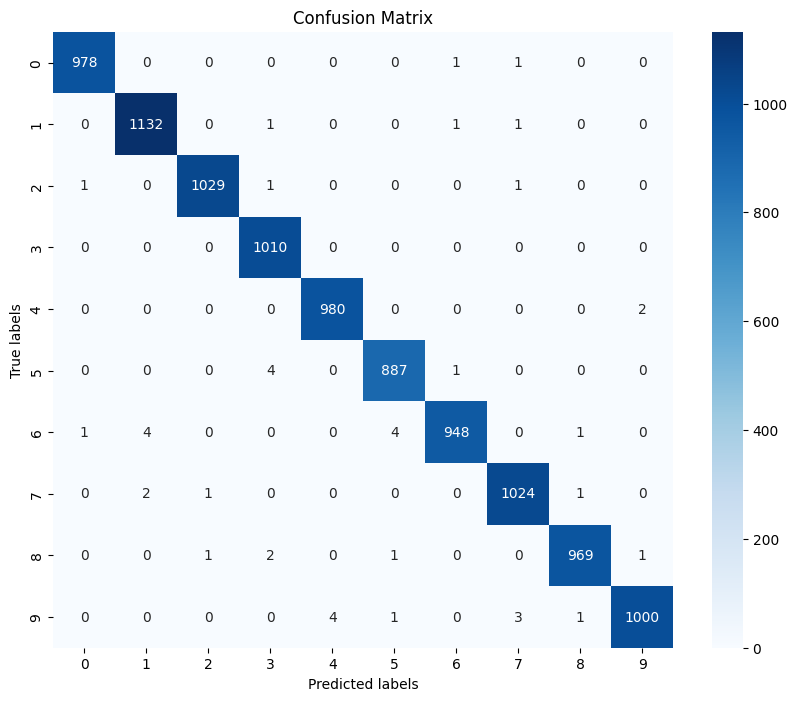

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



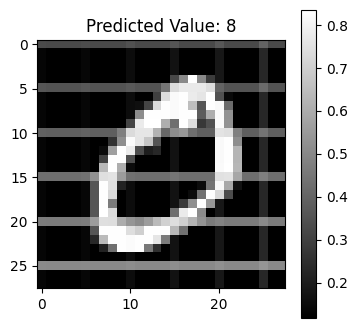

In [22]:

from tensorflow.keras.preprocessing import image

# Function to predict and visualize a single digit
def predict_digit(img_path):
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0) / 255
    prediction = model.predict(img_tensor, verbose=0)

    plt.figure(figsize=(4, 4))
    plt.imshow(img_tensor.reshape(28, 28), cmap='gray')
    plt.colorbar()
    plt.grid(False)
    plt.title(f'Predicted Value: {np.argmax(prediction)}')
    plt.show()

# Example of predicting a digit from an image
predict_digit("/content/zero.jpg")
